# PUI Fall 2017 HW 5-2
### Yuwen Chang (ywc249)
### October 2017
### Objective: compare tests for goodness of fit

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:" data-toc-modified-id="Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using:</a></div><div class="lev1 toc-item"><a href="#AD-and-KS-test" data-toc-modified-id="AD-and-KS-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AD and KS test</a></div><div class="lev2 toc-item"><a href="#KS:-high-p-value-pvalue&gt;0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected" data-toc-modified-id="KS:-high-p-value-pvalue>0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KS: high p-value pvalue&gt;0.05: H0 that sample comes from a Gaussian distribution cannot be rejected</a></div><div class="lev2 toc-item"><a href="#AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected." data-toc-modified-id="AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected.-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax MathJax_Processing" id="MathJax-Element-2-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-2">alpha</script>=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.</a></div><div class="lev1 toc-item"><a href="#try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)" data-toc-modified-id="try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)</a></div><div class="lev1 toc-item"><a href="#KL-DIVERGENCE" data-toc-modified-id="KL-DIVERGENCE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>KL DIVERGENCE</a></div><div class="lev1 toc-item"><a href="#BINOMIAL---INSTRUCTIONS-for-assignment" data-toc-modified-id="BINOMIAL---INSTRUCTIONS-for-assignment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BINOMIAL - INSTRUCTIONS for assignment</a></div><div class="lev2 toc-item"><a href="#WRITE-A-CAPTION-HERE-IN-THIS-CELL.." data-toc-modified-id="WRITE-A-CAPTION-HERE-IN-THIS-CELL..-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>WRITE A CAPTION HERE IN THIS CELL..</a></div><div class="lev1 toc-item"><a href="#POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution" data-toc-modified-id="POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution</a></div><div class="lev1 toc-item"><a href="#NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number" data-toc-modified-id="NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number</a></div>

# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 

1) KS

2) AD

3) KL divergence test

4) Pearson's chisq test

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as st

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# KS and AD test

## Test against Gaussian:
1. Gaussian (mean = 0, std = 1)
2. Poisson with small $\lambda$
3. Binomial with small $np$

In [2]:
# generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

# test ks and ad
print ("normal on normal", st.kstest(dist_n,'norm'))
print ("normal on normal", st.anderson(dist_n, dist='norm'))

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


## Results

## $H_0$: the sample comes from a Gaussian distribution
## $\alpha = 0.05$

### KS: high p-value > 0.05: cannot be rejected

### AD: statistics = 0.26 < the 0.784 critical value for $\alpha$=0.05: cannot be rejected

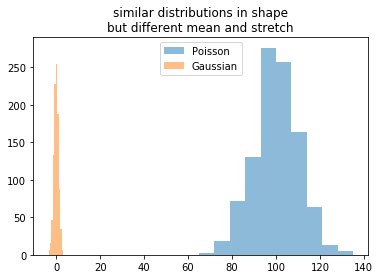

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


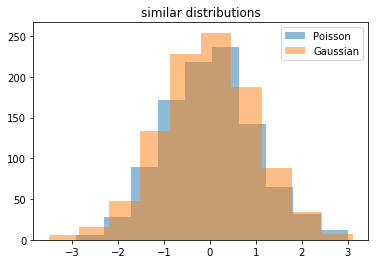

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: higher p-value: does not reject the H0 at alpha=0.05
AD: statistics AD=0.926 larger than threshold (for alpha=0.05): rejects H0
thresh_0.05 = 0.784


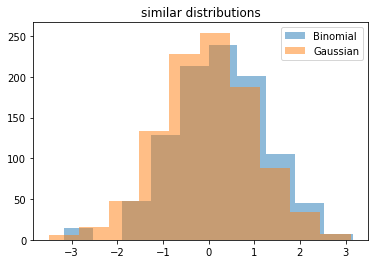

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456609, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: low p-value: rejects the H0 at alpha=0.05
AD: statistics AD=15.852 larger than threshold (for alpha=0.05): rejects H0


In [3]:
np.random.seed(999)

# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", st.kstest(dist_p,'norm'))
print ("poisson on normal", st.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 

# poisson fixed to mean = 0, sd = 1
dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

# print test result
print ("poisson vs normal", st.kstest(dist_p,'norm'))
print ("poisson vs normal", st.anderson(dist_p, dist='norm'))
print ("KS: higher p-value: does not reject the H0 at alpha=0.05") 
print ("AD: statistics AD=0.926 larger than threshold (for alpha=0.05): rejects H0") 

threshold = st.anderson(dist_n, dist='norm')[1] \
           [st.anderson(dist_n, dist='norm')[2]==[5.0]]
print ("thresh_0.05 = %.3f"%threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean, divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

# print test result
print ("binomial vs normal", st.kstest(dist_b,'norm'))
print ("binomial vs normal", st.anderson(dist_b, dist='norm'))
print ("KS: low p-value: rejects the H0 at alpha=0.05") 
print ("AD: statistics AD=15.852 larger than threshold (for alpha=0.05): rejects H0")

# Null hypothesis
### - KS: two distributions are identical
### - AD: a sample is drawn from a population that follows a particular distribution

# KL DIVERGENCE

KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number.

__ empirical distribution__: requires the distribution _y_ value at location _x_.
pass the values of the _distribution_ at some x's, not my histogram though, if I need a  **NORMALIZED HISTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data. 

__model__: then pass a function for my comparison distribution evaluated at the same _x_-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

(pass it the functional form of a normal PDF, returned by the scipy.stats.norm, for example, evaluated at the bin centers of the histogram from before)

In [4]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

# Notice: the extra comma on the left side of the '=' sign: 
# that tells numpy take the first two values returned, and throw away the rest

In [5]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ("normal on normal", 
       st.entropy(distpdf_n, st.norm.pdf(bincenters_n)))
print ("poisson on normal", 
       st.entropy(distpdf_p, st.norm.pdf(bincenters_p)))
print ("binomial on normal", 
       st.entropy(distpdf_b, st.norm.pdf(bincenters_b)))

normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0610420407496


## Interpretation
KL test returns the "entropy", a measure of how one probability distribution diverges from another, it increases as the distributions diverge.

**Meaning of relative entropy**: The information lost when using the alternative distribution to represent the real distribution; or in the other way around, how much information is required to make up for the gap between the two distributions.

**Null hypothesis**: There is no information loss between two distributions.

Regarding the results, poisson has an entropy as low as the sample from normal distribution. Binomial sample has higher entropy, but still low. Thus, we may say that they are acceptable alternative distributions for a Gaussian distribution.

# Binomial

In [6]:
np.random.seed(999)
count = 100
narray = np.linspace(1, 1001, count)
ks_s_b = np.zeros(count)
ks_p_b = np.zeros(count)
ad_b = np.zeros(count)
kl_b = np.zeros(count)
chi_s_b = np.zeros(count)
chi_p_b = np.zeros(count)

# loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5
    
    # generate the normalized distribution
    dist = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))

    # run the tests
    ks_s_b[i] = st.kstest(dist,'norm')[0]
    ks_p_b[i] = st.kstest(dist,'norm')[1]
    ad_b[i] = st.anderson(dist, dist='norm')[0]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    # run the tests
    kl_b[i] = st.entropy(np.histogram(dist, bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))
    chi_s_b[i] = st.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[0]
    chi_p_b[i] = st.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[1]

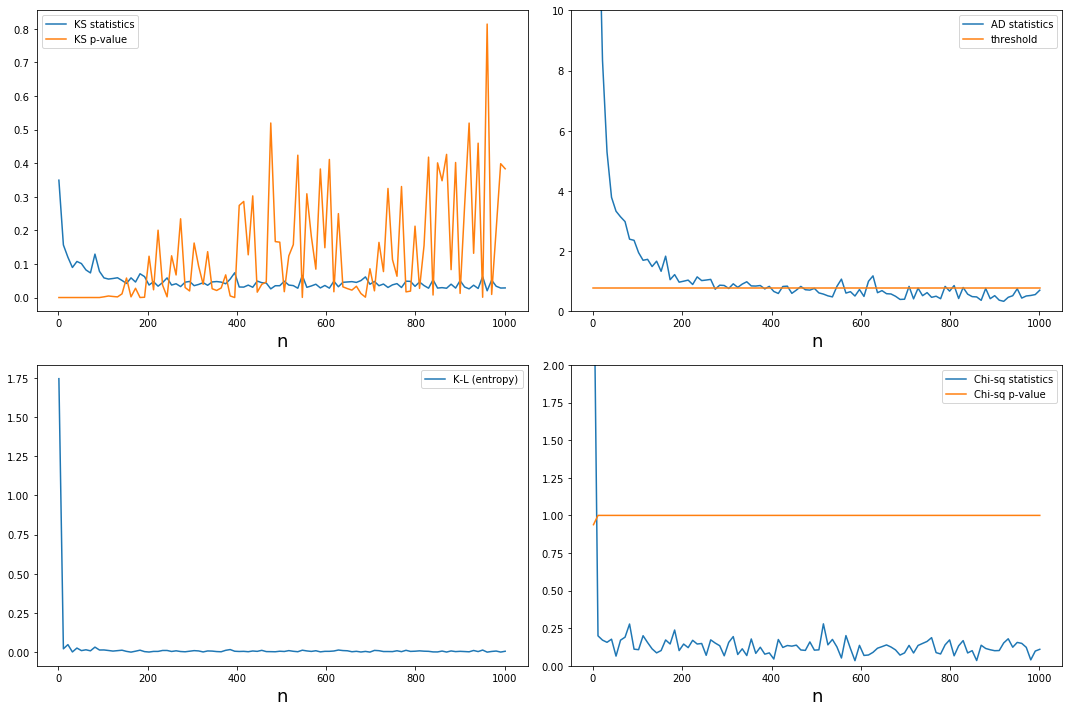

In [7]:
# plot the trends of statistics
fig = pl.figure(figsize = (15,10))

fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.xlabel('n', fontsize=18)
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b, label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.xlabel('n', fontsize=18)
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.xlabel('n', fontsize=18)
pl.legend()

fig.add_subplot(224)
pl.plot(narray, chi_s_b, label='Chi-sq statistics')
pl.plot(narray, chi_p_b, label='Chi-sq p-value')
pl.ylim(0,2)
pl.xlabel('n', fontsize=18)
pl.legend()

pl.tight_layout()

## Fig 1. Different goodness-of-fit tests for binomial distribution with different means against normal distribution

### Binomial distribution looks increasingly similar to Gaussian distribution as the mean of the distribution increases.

#### (1) KS test:

**Null Hypothesis:** the binomial distributions are identical with the normal distribution

**Result:** as the KS statistics drop, the p-value is not stable as $np$ increases and tends to grow larger, which means we are less likely to reject $H_0$ as mean grows. In other words, the binomial distribution grows similar to Gaussian distribution.

#### (2) AD test:

**Null Hypothesis:** the sample drawn from a binomial population is not different from that from a population that follows a normal distribution

**Result:** AD statistics soon drop below the threshold of rejecting $H_0$, which leads to the same result of the KS test.

#### (3) KL Divergence:

**Null Hypothesis:** there is no information loss between the binomial distribution and the normal distribution

**Result:** entropy drops quickly, meaning that the divergence, or information loss between the binomial and the Gaussian distribution has decreased a lot, which also means they grow similar.

#### (4) Chi-square test:

**Null Hypothesis:** the observed binomial distribution is not different from the expected normal distribution

**Result:** p-values rise high as Chi-sq statistics drop very quickly, which means we are less likely to reject $H_0$ as mean grows. In other words, the binomial distribution grows similar to Gaussian distribution.

# Poisson

In [8]:
np.random.seed(999)
count = 100
narray = np.linspace(1, 1001, count)
ks_s_p = np.zeros(count)
ks_p_p = np.zeros(count)
ad_p = np.zeros(count)
kl_p = np.zeros(count)
chi_s_p = np.zeros(count)
chi_p_p = np.zeros(count)

# loop over the different values of lambda
for i,lam in enumerate(narray):
    
    # generate the normalized distribution
    dist = (np.random.poisson(lam, 1000) - lam) / np.sqrt(lam)
    
    # run the tests
    ks_s_p[i] = st.kstest(dist,'norm')[0]
    ks_p_p[i] = st.kstest(dist,'norm')[1]    
    ad_p[i] = st.anderson(dist, dist='norm')[0]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    # run the tests
    kl_p[i] = st.entropy(np.histogram(dist, bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))
    chi_s_p[i] = st.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[0]
    chi_p_p[i] = st.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[1]

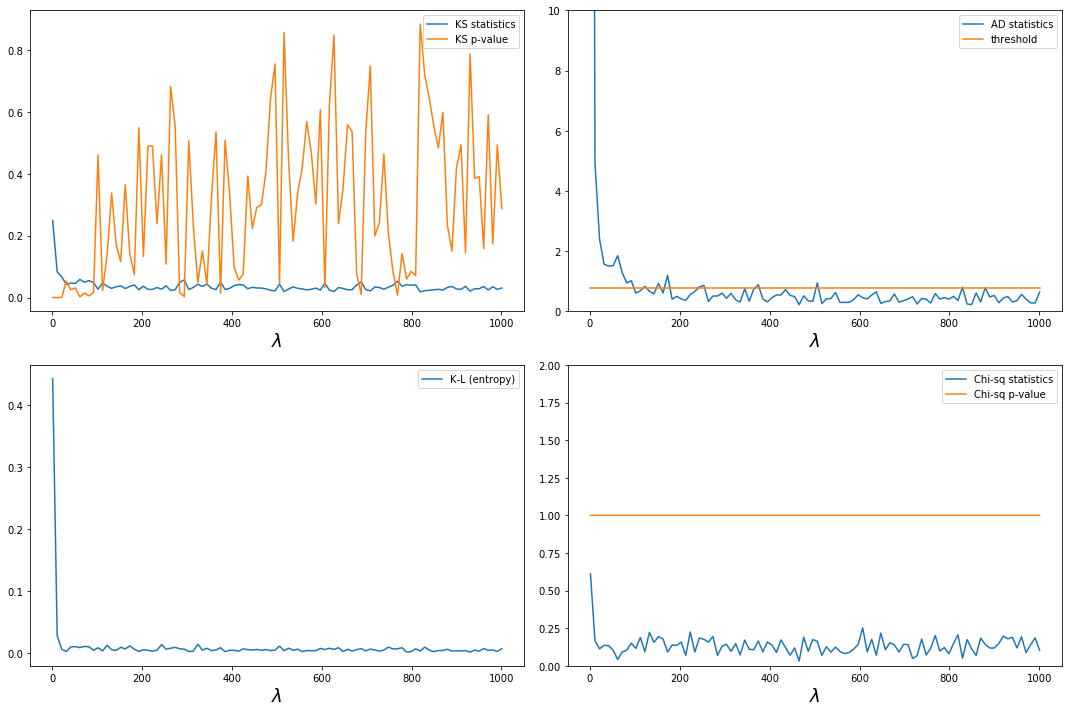

In [9]:
# plot the trends of statistics
fig = pl.figure(figsize = (15,10))

fig.add_subplot(221)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.xlabel('$\lambda$', fontsize=18)
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_p, label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10)
pl.xlabel('$\lambda$', fontsize=18)
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.xlabel('$\lambda$', fontsize=18)
pl.legend()

fig.add_subplot(224)
pl.plot(narray, chi_s_p, label='Chi-sq statistics')
pl.plot(narray, chi_p_p, label='Chi-sq p-value')
pl.ylim(0,2)
pl.xlabel('$\lambda$', fontsize=18)
pl.legend()

pl.tight_layout()

## Fig 2. Different goodness-of-fit tests for poisson distribution with different means against normal distribution

### Poisson distribution looks increasingly similar to Gaussian distribution as the mean of the distribution increases.

#### (1) KS test:

**Null Hypothesis:** the poisson distributions are identical with the normal distribution

**Result:** as the KS statistics drop, the p-value is not stable as $\lambda$ increases and tends to grow larger, which means we are less likely to reject $H_0$ as mean grows. In other words, the poisson distribution grows similar to Gaussian distribution.

#### (2) AD test:

**Null Hypothesis:** the sample drawn from a poisson population is not different from that from a population that follows a normal distribution

**Result:** AD statistics soon drop below the threshold of rejecting $H_0$, which leads to the same result of the KS test.

#### (3) KL Divergence:

**Null Hypothesis:** there is no information loss between the poisson distribution and the normal distribution

**Result:** entropy drops quickly, meaning that the divergence, or information loss between the poisson and the Gaussian distribution has decreased a lot, which also means they grow similar.

#### (4) Chi-square test:

**Null Hypothesis:** the observed poisson distribution is not different from the expected normal distribution

**Result:** p-values rise high as Chi-sq statistics drop very quickly, which means we are less likely to reject $H_0$ as mean grows. In other words, the poisson distribution grows similar to Gaussian distribution.